# Excercise - Multi-class classification of MNIST using Perceptron

In binary perceptron, where $\mathbf{y} \in \{-1, +1\}$, we used to update our weights only for wrongly classified examples.

The multi-class perceptron is regarded as a generalization of binary perceptron. Learning through iteration is the same as the perceptron. Weighted inputs are passed through a multiclass signum activation function. If the predicted output label is the same as true label then weights are not updated. However, when predicted output label $\neq$ true label, then the wrongly classified input example is added to the weights of the correct label and subtracted from the weights of the incorrect label. Effectively, this amounts to ’rewarding’ the correct weight vector, ’punishing’ the misleading, incorrect weight
vector, and leaving alone an other weight vectors.

In [3]:
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#from utils import plot_decision_boundary, multi_class_signum, get_accuracy, get_prediction
#from utils import plot_2D_input_datapoints, generate_gifs, normalize, signum

import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns; sns.set();
import pandas as pd
import math
#import gif
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Setting the seed to ensure reproducibility of experiments
np.random.seed(11)

# One-hot encoding of target label, Y
def one_hot(a):
    b = -1 * np.ones((a.size, a.max()+1))
    b[np.arange(a.size), a] = 1
    return b

# Loading digits datasets
digits = datasets.load_digits()

# One-hot encoding of target label, Y
Y = digits.target
Y = one_hot(Y)

# Adding column of ones to absorb bias b of the hyperplane into X
X = digits.data
bias_ones = np.ones((len(X), 1))
X = np.hstack((X, bias_ones))

In [5]:
# Train-val-test data
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, shuffle=True, test_size = 0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.12517)

print("Training dataset: ", X_train.shape)
print("Validation dataset: ", X_val.shape)
print("Test dataset: ", X_test.shape)

Training dataset:  (1257, 65)
Validation dataset:  (180, 65)
Test dataset:  (360, 65)


<Figure size 432x288 with 0 Axes>

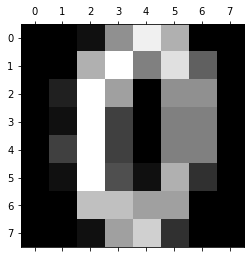

In [6]:
sns.reset_orig();

plt.gray()
plt.matshow(digits.images[10])
plt.show();

In [9]:


def core_algo(X_train,Y_train,epochs,lr):
    
    start = 1
    W = np.zeros((X_train.shape[1],1))

    for i in range(epochs):
        error_count = 0
        total_sum = 0
        for x,y in zip(X_train,Y_train):

            x = np.reshape(x,(x.shape[0],1))
            y_pred = W.T@x
           
            if (y_pred*y)<=0:
                
                error_count+=1
                total_sum+=((lr*y*x))

        start+=1
        W += total_sum
    return W,error_count



def train_algo(X_train,Y_train,epochs,lr):
    
    W_final = np.zeros((X_train.shape[1],Y_train.shape[1]))
    for classie in range(Y_train.shape[1]):

        yee = Y_train[:,classie]

        W,error_count = core_algo(X_train,yee,epochs,lr)
        print("For digit %d the number of misclassified samples after training is %d"%(classie,error_count))
        W_final[:,classie] = W[:,0]
    return W_final
        
Weightsies = train_algo(X_train,Y_train,1000,0.1)



For digit 0 the number of misclassified samples after training is 0
For digit 1 the number of misclassified samples after training is 16
For digit 2 the number of misclassified samples after training is 0
For digit 3 the number of misclassified samples after training is 5
For digit 4 the number of misclassified samples after training is 0
For digit 5 the number of misclassified samples after training is 0
For digit 6 the number of misclassified samples after training is 0
For digit 7 the number of misclassified samples after training is 0
For digit 8 the number of misclassified samples after training is 77
For digit 9 the number of misclassified samples after training is 49


In [10]:
def prediction(X,Y,W):
    
#     print(W.shape)
    no_of_digits = Y.shape[1]
    predicted_classes = np.zeros((X.shape[0],1))
    
    for i in range(X.shape[0]):
        
        for digit in range(no_of_digits):
            
            x = np.reshape(X[i,:],(X[i,:].shape[0],1))

            W_slice = W[:,digit]
            predict_digit = W_slice.T@x

            if predict_digit>0:
                
                predicted_classes[i,0] = digit
                break
                
    return predicted_classes

predicted_val = prediction(X_val,Y_val,Weightsies)
predicted_test = prediction(X_test,Y_test,Weightsies)
predicted_train = prediction(X_train,Y_train,Weightsies)

def accuracy_calculator(preds,y):
    
    error = 0
    no_of_samples = y.shape[0]
    
    for i in range(no_of_samples):
        
        y_sample = y[i,:]
        pred = preds[i]
        
        if y_sample[int(pred)]!=1:
            
            error+=1
            
    accuracy = 1 - (error/no_of_samples)
    return accuracy

accuracy_val = accuracy_calculator(predicted_val,Y_val)
accuracy_test = accuracy_calculator(predicted_test,Y_test)
accuracy_train = accuracy_calculator(predicted_train,Y_train)

print("The accuracy for train is:")
print(accuracy_train*100)
print("The accuracy for validation is:")
print(accuracy_val*100)
print("The accuracy for test is:")
print(accuracy_test*100)

The accuracy for train is:
90.69212410501193
The accuracy for validation is:
87.22222222222223
The accuracy for test is:
86.38888888888889
